In [1]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import requests
from sklearn.model_selection import train_test_split
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
import numpy as np

In [2]:
# URL of the CSV file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
# Download the CSV file
response = requests.get(url)
csv_content = response.content

# Save the downloaded CSV content to a local file
with open('downloaded_data.csv', 'wb') as file:
    file.write(csv_content)

# Load the CSV content into a DataFrame
df = pd.read_csv('downloaded_data.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [5]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [6]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [7]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

as we see Variable Sex , BP and Cholesterol are categorical variable and as we know Decision cant deal with categorical variable so we will use one-hotencoder to solve this problem 

In [8]:
df_dummies_sex =  pd.get_dummies(df['Sex'], 'Sex').astype(int)

df_dummies_BP =  pd.get_dummies(df['BP'], 'BP').astype(int)

df_dummies_Chol =  pd.get_dummies(df['Cholesterol'], 'Cholesterol').astype(int)


In [9]:
# Concatenate the dummy columns with the original DataFrame 
df = pd.concat([df ,df_dummies_sex], axis=1)
df = pd.concat([df ,df_dummies_BP], axis=1)
df = pd.concat([df ,df_dummies_Chol], axis=1)
#drop the original columns
df.drop(['Sex', 'BP', 'Cholesterol'], axis=1, inplace=True)

In [10]:
df.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,drugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,drugY,1,0,0,1,0,1,0


Now we will use decision tree model

In [11]:

#split the data into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#use the DecisionTreeClassifier to train the model
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(x_train, y_train)  


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
y_hat = drugTree.predict(x_test)

In [14]:
#check the accuracy of the model
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))

DecisionTrees's Accuracy:  1.0


In [15]:
from sklearn.tree import export_graphviz
export_graphviz(drugTree, out_file='drugtree.dot', feature_names=X.columns, class_names=np.unique(y_train), filled=True, special_characters=True, rotate=False)


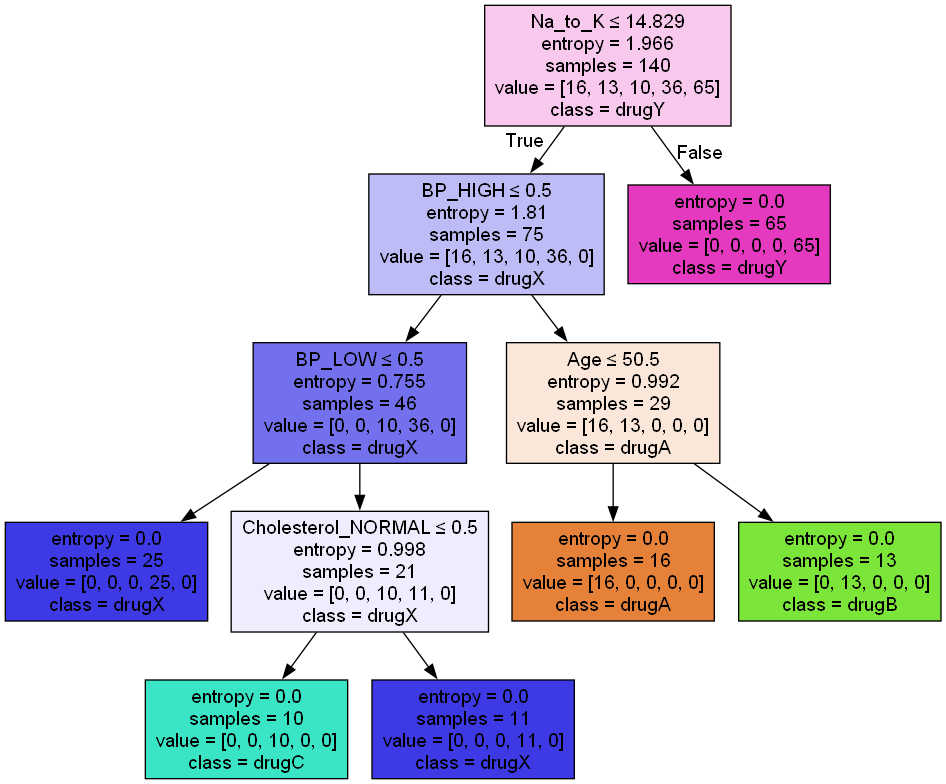

In [20]:
export_graphviz(drugTree, out_file='drugtree.dot', feature_names=X.columns, class_names=np.unique(y_train), filled=True, special_characters=True)

# Convert .dot to .png using pydot
(graph,) = pydot.graph_from_dot_file('drugtree.dot')
graph.write_png('tree.png')

# Display the image in the notebook
Image('tree.png')

In [ ]:
!dot -Tpng tree.dot -o tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
